In [269]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
from egxpy.download import  get_OHLCV_data,get_EGX_intraday_data, get_EGXdata
from egxpy.optimization import portfolio_performance,optimize
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [20, 10]
plt.style.use('ggplot')



## Fetch close prices for Multiple Stocks

In [244]:
date = dt.today().date()
end = date
start = dt(2020, 5, 17).date()
daily_prices = get_EGXdata(stock_list=['ABUK','COMI','TMGH','FWRY', 'SWDY', 'TALM'],interval='Daily',start=start,end=end)
daily_prices    #daily close prices

,ABUK,COMI,TMGH,FWRY,SWDY,TALM
Date,,,,,,
2020-05-17,11.93,32.175385,5.08,2.397528,7.51,NaN
2020-05-18,11.75,32.085648,5.00,2.381650,7.21,NaN
2020-05-19,11.87,32.379782,5.03,2.442892,7.28,NaN
2020-05-20,11.73,32.030809,5.01,2.565377,7.24,NaN
2020-05-21,11.96,31.163359,5.05,2.608474,7.43,NaN
...,...,...,...,...,...,...
2025-03-24,55.74,81.900000,53.20,9.250000,81.70,11.00
2025-03-25,55.26,81.710000,53.09,9.200000,80.50,11.00
2025-03-26,56.00,81.900000,52.92,9.350000,82.70,11.00


## Fetch open, high, low, close, volume for a single stock

In [245]:
ohlcv = get_OHLCV_data(symbol='ABUK',exchange='EGX',interval='Daily',n_bars=100)
ohlcv

,symbol,open,high,low,close,volume
datetime,,,,,,
2024-11-07 10:00:00,EGX:ABUK,55.90,56.80,55.90,56.07,730040.0
2024-11-10 10:00:00,EGX:ABUK,56.07,56.39,55.60,55.81,1021359.0
2024-11-11 10:00:00,EGX:ABUK,55.81,55.83,55.04,55.20,2053266.0
2024-11-12 10:00:00,EGX:ABUK,55.20,55.38,54.65,55.01,1020655.0
2024-11-13 10:00:00,EGX:ABUK,55.01,55.24,54.68,54.68,910623.0
...,...,...,...,...,...,...
2025-03-24 10:00:00,EGX:ABUK,57.00,57.47,55.62,55.74,380735.0
2025-03-25 10:00:00,EGX:ABUK,55.74,56.00,55.05,55.26,255158.0
2025-03-26 10:00:00,EGX:ABUK,55.26,57.89,54.80,56.00,476692.0


## Get intraday close prices at a desired timeframe 

In [246]:
start = end - timedelta(days=10) # last 10 days
intrday_prices = get_EGX_intraday_data(stock_list=['ABUK', 'COMI'], interval='5 Minute', start=start,end=end)
intrday_prices

ERROR:tvDatafeed.main:Connection to remote host was lost.
ERROR:tvDatafeed.main:no data, please check the exchange and symbol


,ABUK,COMI
datetime,,
2025-03-25 12:00:00+02:00,55.99,81.69
2025-03-25 12:05:00+02:00,56.00,81.55
2025-03-25 12:10:00+02:00,56.00,81.70
2025-03-25 12:15:00+02:00,55.85,81.71
2025-03-25 12:20:00+02:00,55.89,82.00
...,...,...
2025-04-03 15:00:00+02:00,56.17,80.97
2025-04-03 15:05:00+02:00,56.20,81.00
2025-04-03 15:10:00+02:00,56.15,80.85


In [247]:
optimal_weights = optimize(type='Sharpe',close=daily_prices,n=252,risk_free_rate=0.27,upper_bound=0.3)

In [248]:
optimal_weights

,ticker,weight
0,ABUK,0.1482
1,COMI,0.1809
2,TMGH,0.3000
3,FWRY,0.0000
4,SWDY,0.3000
5,TALM,0.0709


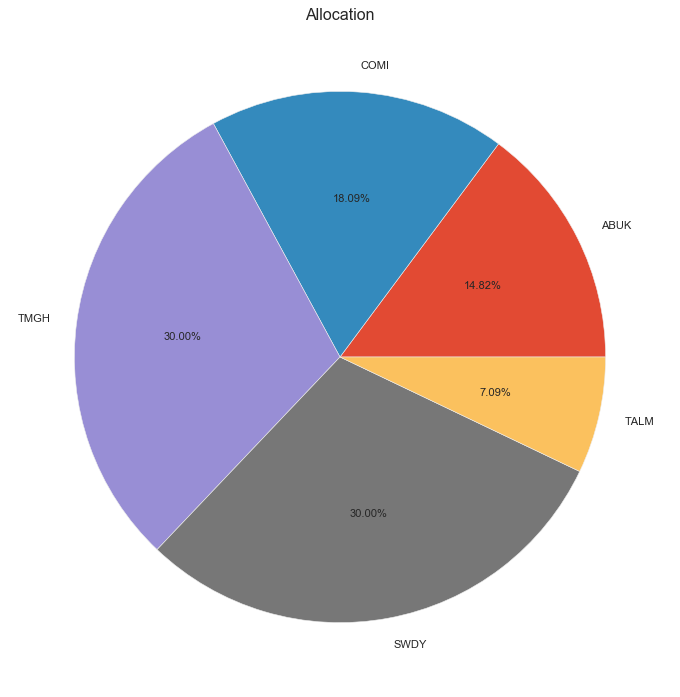

In [270]:
portfolio_allocation = optimal_weights[optimal_weights.weight>0]
plt.figure(figsize=(10,10))
plt.pie(portfolio_allocation.weight, labels=portfolio_allocation.ticker, autopct=lambda v: f'{v:.2f}%')
plt.title('Allocation')
plt.show()

In [250]:
mean_vector = daily_prices.pct_change().mean()
covariance_matrix = daily_prices.pct_change().cov().values

expected_returns, risk = portfolio_performance(optimal_weights['weight'],
                                               mean_returns=mean_vector,
                                               cov=covariance_matrix,n=252)
print(f'Expected Returns: {expected_returns:.2%}')
print(f'Risk: {risk:.2%}')


Expected Returns: 57.03%
Risk: 32.80%


In [251]:
w = optimal_weights['weight'].values.reshape((-1,1))

In [252]:
portfolio = daily_prices @ w
portfolio.columns = ['PORTFOLIO']

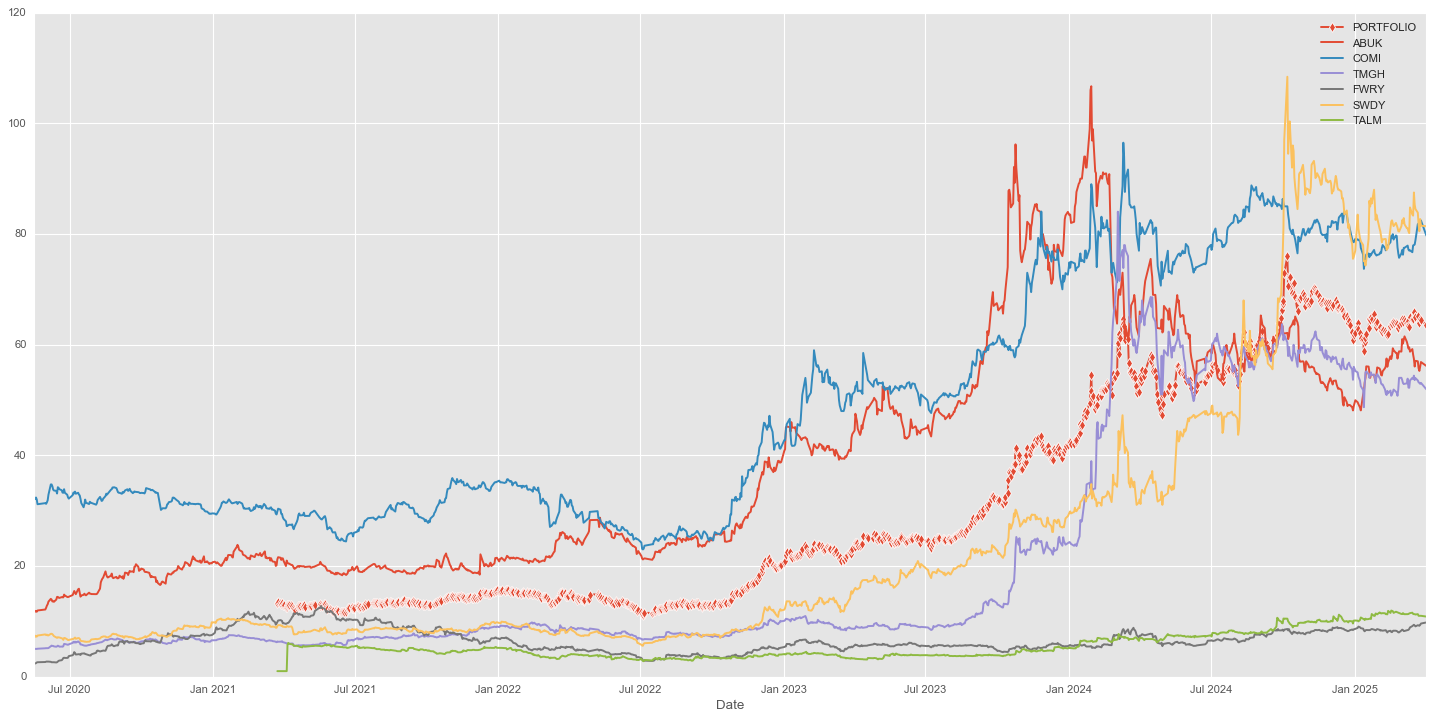

In [271]:
plt.figure(figsize=(20,10))

sns.lineplot(portfolio,markers='dot')
sns.lineplot(daily_prices,dashes=False)
plt.show()